# Graphical Modeling
<strong>This notebook contains general notes about grpahical modeling. It was used to create the presentation.pptx file in this repo. This file is a reference for the presenter.</strong>

Graphical Modeling is using graphs to represent probability distributions or sets of them.

<img src='img/gm.jpg' width='600px' />


# Hierarchical Modeling
Refers to modeling that looks like this:

\begin{align}
y|x,\theta & \sim P(y|x,\theta) \\
x|\theta & \sim P(x|\theta) \\
\theta & \sim P(\theta)
\end{align}

# Probablistic Modeling
* Probablistic Modeling is more general term

# (Bayesian or Otherwise)

* Modeling data using probability (mainly conditional probably relations). For example, this random variable is ditributed with distribution X parameterised by this other RV Y.

# For Machine Learning

# Introduction: What is Machine Learning? How do GMs fit in?

When we say machine learning we might think of a set:

`
{
    (x1, y1),
    (x2, y2),
    .        
    .        
    .        
    (xn, yn) 
}
`
We might try to:
1. <strong>Learn a mapping</strong> function `y = f(x)` to predict `y` for new values of `x`
2. Model `(x, y)` together to <strong>generate</strong> new values for `(x, y)`
3. Run regression models or classification models to determine which of `x`'s dimentions has impact on `y`. This is not just for prediction but for <strong>making some informed conclusions</strong>. This might involve hypothesis testing.

<strong>Notes:</strong>
* `x, y` can have multiple dimentions and can be continuous or discrete. This will determine whether we are doing regression or classification.
* <strong>In GM we can do all the above.</strong>

# Learning (fitting)

In all the cases above we usually need to fit a model

Two steps:
1. Define a model: A set of possible functions which predict or generate your data, parameterised by some `theta`
2. Define a loss function: A function of `theta` (and your data) which you need to optimise (minimise) with respect to `theta` to end up with the best possible model.

# Probablity and Machine Learning

<strong>Quetions:</strong>
* Now what does probability have to do with machine learning?
* Or, when does a model become probablistic?

<strong>Answer:</strong> When the model is a probability distribution (or a set of parameterised ones). In other words, when we treat our unknowns (and sometimes the observed) as random variables.
* For example, find the most likely distribution which generated the data we observed.
* Or, find the most likely conditional distribution which would generate `y` given `x`.

ِAnd usualy the loss function used is the likelihood. More on this later.

# And this is how GMs fit in as they represent probablity distributions or a parameterised set thereof!

# Probabilty Distributions

* A function which maps an outcome to a number between 0 and 1 which represents its probability of occurance. 
* Outcomes can be represented by discrete or continuous numbers.
* `theta = 0.325636` is an outcome, `y = 1` is an outcome.

# Some Rules

* Probability distributions can be univariate or multivariate.
    * Univariate: The probability `P(theta = 0.43)`
    * Multivariate: The probability `P(theta = 0.43 & y = 1)`
* `P(x,y,theta)` is one way to refer to the joint probability over your data and parameters.
* `P(x,y,theta) = P(x,y|theta) * P(theta)` you often see this in literature. This is the chain rule. if you do the chain rule one the left by reversing `x, y` and `theta` you get Bayes theorem.
* Chain rule taken for granted and hence Bayes.

# Intuitions behind in Probablistic ML... And hence GMs

* `P(x,y,theta)` refers to all possible distrbutions (infinit possibilities).
* Imagine if you had 1 probability and you had to split it between all combinations of `x,y,theta` assignments.
* In probablistic machine learning usually we ask one of these questions:
    * Which is the `theta` which most likely generated the data `x, y`? (more frequentist)
    * Which is the `theta` which given the `x` part of the data, generated the `y` part of the data? (also frequentist)
    * What do I know about `theta` before and after seeing the data? (more Bayesian)

# How to Represent `P(x,y,theta)`?

* Infinite possibilities of distributions and parameterisations
* We have to simplify it

# Back to the basics `P(x,y,z)`

* Using the chain rule: `P(x,y,z) = P(x|y,z) * P(y,z) = P(x|y,z) * P(y|z) * P(z)`
* We can see that the set of all possible, multivariate distributions factorises to simpler parameterised (conditional) univariate distributions
* Still the collective complexity has not changed

# Graphical Modeling

* Represent distribution with a set of conditional dependancies from the chain rule
* Reduce the complexity by assuming conditional independance relations
* These assumptions of conditional independance are usually informed

# Now simplify

`P(x,y,z) = P(x|y,z) * P(y,z) = P(x|y,z) * P(y|z) * P(z)` becomes:
* what if I change it to this: `P(x|y) * P(y|z) * P(z)`
* Or this: `P(x|z) * P(y|z) * P(z)`
* we reduce complexity and the set of possible distributions, maybe if we represent it as a graph

# NOW Graphical Models

* Let's represent every sufficient conditional dependancy as an edge, and every random variable as a node
* Usually dark nodes are observed and light nodes are random variables (generated or sampled)
* Ignore the colors for now

In [1]:
import networkx as nx
G = nx.DiGraph()

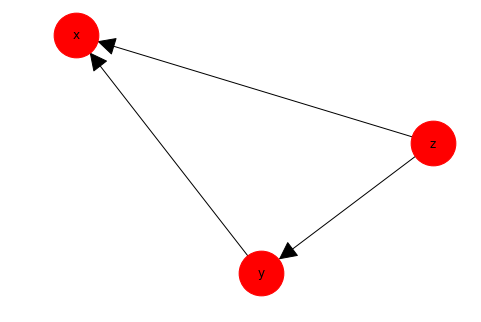

In [27]:
G.clear()
G.add_nodes_from(['x', 'y', 'z'])
G.add_edges_from([('z', 'y'), ('z', 'x'), ('y', 'x')])
nx.draw(G, with_labels=True, node_size=2000, arrowsize=40)

# Markov Assumption (a simplification)

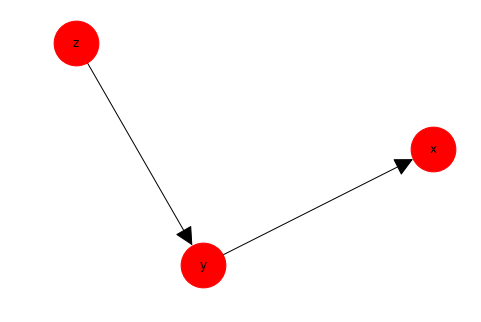

In [28]:
G.clear()
G.add_nodes_from(['x', 'y', 'z'])
G.add_edges_from([('z', 'y'), ('y', 'x')])
nx.draw(G, with_labels=True, node_size=2000, arrowsize=40)

# Naive Bayes Assumption (a simplification)

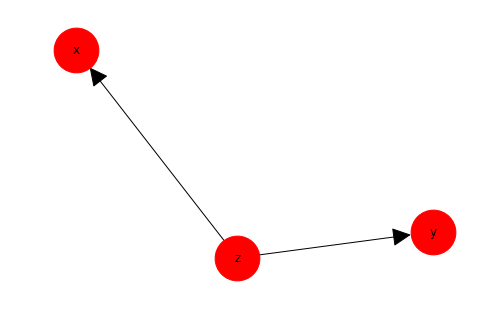

In [32]:
G.clear()
G.add_nodes_from(['x', 'y', 'z'])
G.add_edges_from([('z', 'y'), ('z', 'x')])
nx.draw(G, with_labels=True, node_size=2000, arrowsize=40)

# More Real Examples of Directed Asyclic Graphical Models

## HMM

<img src="bayes_hmm.png" />

from http://blog.oliverparson.co.uk/2014/12/infer-hmm-infernet-implementation-of.html

# Other Types of Graphs

* We presented Directed Acyclic Graphs (DAGs)
* There are other types of graphical models:
    * Undirected Graphs (UGs): Parameterise by a splitting the random variables into subsets and giving each subset (clique) a parameterised joint distribution
    * Factor Graphs (FGs): Like UGs, they represent the joint distribution with the product of many subjoint distributions but with different visual and mathematical representation
* We will focus on DAGs
* All 3 types of graphs are able to model all types of distributions. They just have different parameterisations and usually different learning loss functions and algorithms
* There are different laws of conditional independence for each type of graph

# Conditional Independence (or just independance given what we know which is always the case)

* Two nodes are said to be conditionally independent if:
    * They are completely lie in disjoint parts of the graph.
    * They are D separated.

# Do not Confuse with Generative and Discriminative models

* Discriminitive and Generetive models are not analogies of UGs and DAGs!
* UGs and DAGS are different parameterisations and they differ in which probability distributions they can model.
* UGs are harder to learn due to the normalisation parameter which depends on x Z(x).
* Markov Random Fields MRF is another name for UGs and they define a general set of models.
* For examples, conditional random fields are MRFs trained on the conditional Likelihood.

# Also, do not confuse baysian and non-baysian with discriminative and generative models
* Often there is a distinction between Generative and Discriminative "Learning" and "Models"
* We can choose one of the two as a consistant way to describe the difference between models.
* But generally, models are often associated with training procedures which are described as both Generative or Discriminative. For example CRFs are discriminative and they are discriminatively trained. Although CRFs are not necessarily discriminative.
* It is important to note that discriminative training is not bayesian within the specified model but within the imaginary "different model".
* Since all our examples are bayesian, we will only train generatively. But if the model has an independent X generation process then this would be equivalent to some discriminative training.

Generative: ```P(y;a) * P(x|y;b)``` can be translated to ```P(x;f1(a,b)) * P(y|x;f2(a,b))```
    
Discriminative: ```P(x;c) * (y|x;d)``` where ```c``` and ```d``` are independent

So a discriminative model is a model where the parameters which generate x are independent (different) of the parameters which generate y given x. And the training in the context of Graphical Modelling is the same for both discriminative and generative models.

* Ng shows how generative models reach their higher assimtotic error faster.
* Bishop (<a href="https://www.microsoft.com/en-us/research/wp-content/uploads/2016/05/Bishop-Valencia-07.pdf">Generative or Discriminative? Getting the Best of Both Worlds</a>) shows how discriminative training is basically generative training of a different model. This different model assumes and independent process for generating the Xs.

# Back to Fitting

1. Maximum Likelihood (frequentist)
    * Find the max of L(theta) = Product(P(xi,yi|theta))
2. MAP (more Bayesian)
    * Find the max of P(theta\`) = P(theta|xi,yi for all i) * P(theta)
3. Monte Carlo (more Bayesian)
    * Sample from the posterior of theta give the data P(theta\`)
    
NOTEs:
* MLE is a special case of MAP where P(theta) is uninformative Uniform. P(theta) = 1
* There are other distributions we can find given the data like the prior predictive distribution and the posterior predictive distribution

# Other Things to Do with a Graphical Model

* Prior Predictive Distribution P(x`,y`|theta) (predict more data before gathering data)
* Posterior Predictive distribution P(x`,y`|x,y,theta) (predict more data after gathering data)

# Some Notes

* The arrows in a DAG can sometimes be completely deterministic operations.
* Basically, each node is deterimined by ALL the incoming arrows by:
    * Parameterising a probability distribution
    * Input to a deterministic formula
* Deterministic Operations are usually represented with different style of edges.
* Plate Notation: When there are parts of the graph which repeat many times, the plate notation helps confine the graphical model's visualisation size.
* Simplification is not only by reducing the number of edges in the graph, but also by determining how every arrow works (every conditional dependency). Is it Normal? Is it Gamma? Is it ...?

# Frequentism vs Baysian

* GMs represent probability distributions or a set thereof.
* when making inference we can add priors to the unkown values/parameters we are trying to infer.
* This is called being Baysian.
* So, Maximum Likelihood is frequentist but MAP is baysian (but they are point estimates).
* In a Baysian setting, we can get the posterior rather than the MAP (or an apporximation of it using Variation Inference or Markov Chain Monte Carlo MCMC)
* Although in Hypothesis testing for example, the difference between being Baysian or not is slightly different.
* The difference is mainly the fact that I never seen someone doing confidence intervals on the parameters when using Maximum Likelihood.
* So, as far as I know, it is all about the prior over the parameters. Which is involves to treating the parameters are random variables.

# Summary

* A DAG represents a set of probability distributions.
* Give a data set we are looking for the one which most likely generated the data (or to that effect).